# Unsupervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of unsupervised learning model evaluation.

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.features import ParallelCoordinates
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


In [51]:
data = datasets.load_wine()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
X.head()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [52]:

X = StandardScaler().fit_transform(X)
y = pd.Series(data["target"])


## 1. Train a KMeans clustering model on the data set using 8 clusters and compute the silhouette score for the model.

In [30]:
kmeans = KMeans(n_clusters=8, random_state=42)

kmeans.fit(X)

labels = kmeans.labels_

silhouette_avg = silhouette_score(X, labels)

print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.1570139556393107


/Users/noeliarosonmartin/anaconda3/envs/clase/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


## 2. Train a KMeans clustering model on the data set using 5 clusters and compute the silhouette score for the model.

In [31]:
kmeans = KMeans(n_clusters=5, random_state=42)

kmeans.fit(X)

labels = kmeans.labels_

silhouette_avg = silhouette_score(X, labels)

print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.20161908294074093


/Users/noeliarosonmartin/anaconda3/envs/clase/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


## 3. Train a KMeans clustering model on the data set using 3 clusters and compute the silhouette score for the model.

In [32]:
kmeans = KMeans(n_clusters=3, random_state=42)

kmeans.fit(X)

labels = kmeans.labels_

silhouette_avg = silhouette_score(X, labels)

print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.2848589191898987


/Users/noeliarosonmartin/anaconda3/envs/clase/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


## 4. Use elbow curve visualizations to see if you can determine the best number of clusters to use.

The Yellowbrick library has 3 metrics that you can plot using the `metric` parameter:

- **distortion**: mean sum of squared distances to centers
- **silhouette**: mean ratio of intra-cluster and nearest-cluster distance
- **calinski_harabaz**: ratio of within to between cluster dispersion

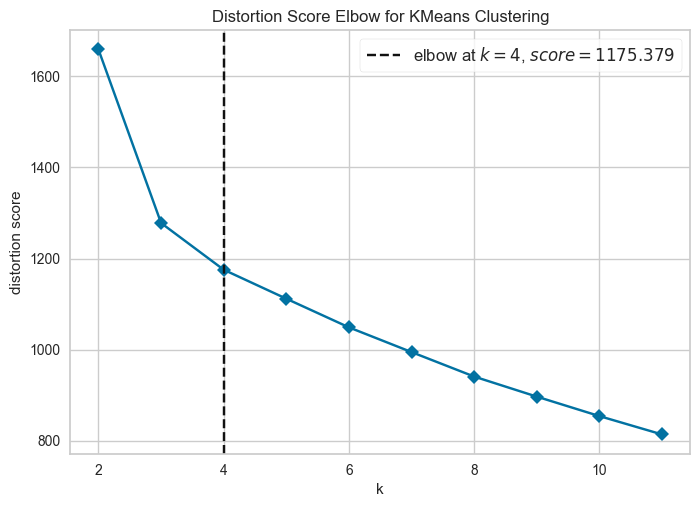

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [33]:

kmeans = KMeans(n_init=10)
visualizer = KElbowVisualizer(kmeans, k=(2, 12), metric='distortion', timings=False, color='red')

visualizer.fit(X)
visualizer.poof()

## 5. Try performing the same elbow tests with an AgglomerativeClustering model and compare the results you get to the KMeans results.

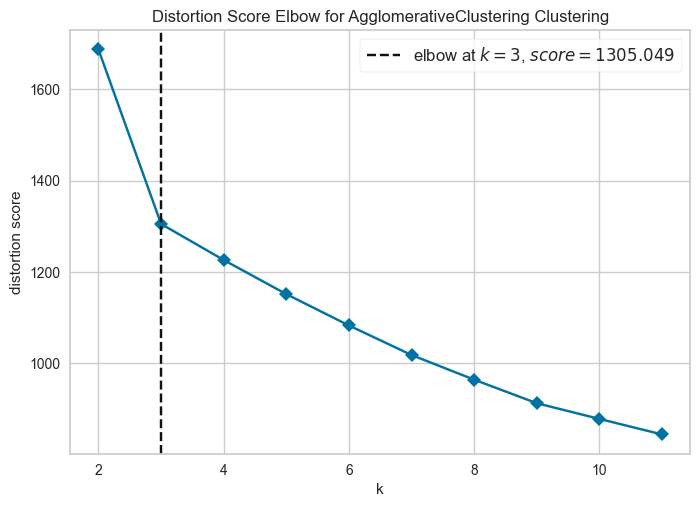

<Axes: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [34]:
model = AgglomerativeClustering()

visualizer = KElbowVisualizer(model, k=(2, 12), metric='distortion', timings=False)

visualizer.fit(X)
visualizer.poof()

## 6. Create and plot a scatter matrix showing how the clusters are grouped across all the different combinations of variables in the data.

Use the model and number of clusters that returned the best result above.

/var/folders/m2/l183zt3s7vq40zq72nm_rcqr0000gn/T/ipykernel_1569/1399310494.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(best_model.cluster_centers_[:, 0], best_model.cluster_centers_[:, 1], c='red', s=50, cmap= 'Oranges', alpha=0.75)


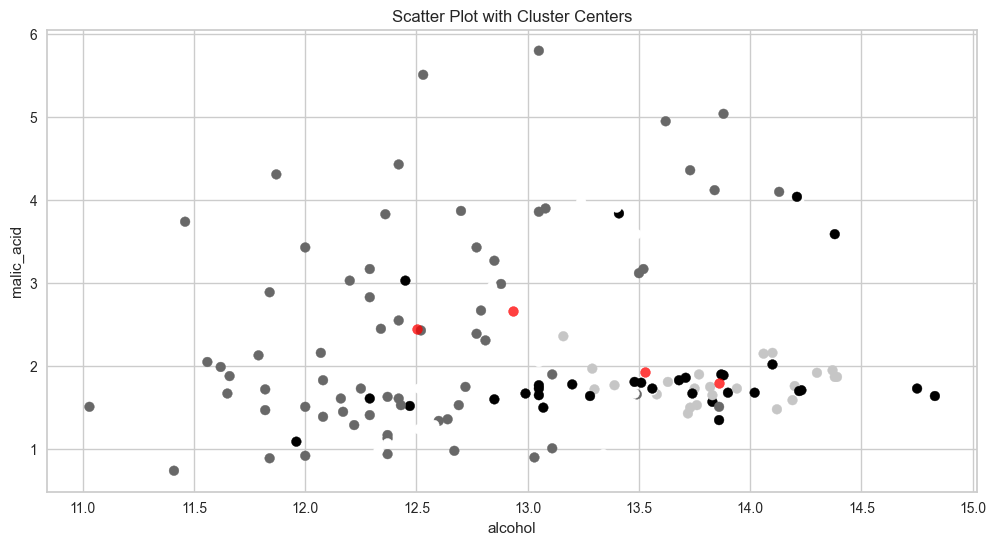

In [47]:
plt.figure(figsize=(12, 6))
plt.scatter(X_with_labels.iloc[:, 0], X_with_labels.iloc[:, 1], c=labels)
plt.scatter(best_model.cluster_centers_[:, 0], best_model.cluster_centers_[:, 1], c='red', s=50, alpha=0.75)
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.title('Scatter Plot with Cluster Centers')
plt.show()

## 7. Apply a PCA transform and plot the first two principle components with the plot point colors determined by cluster.

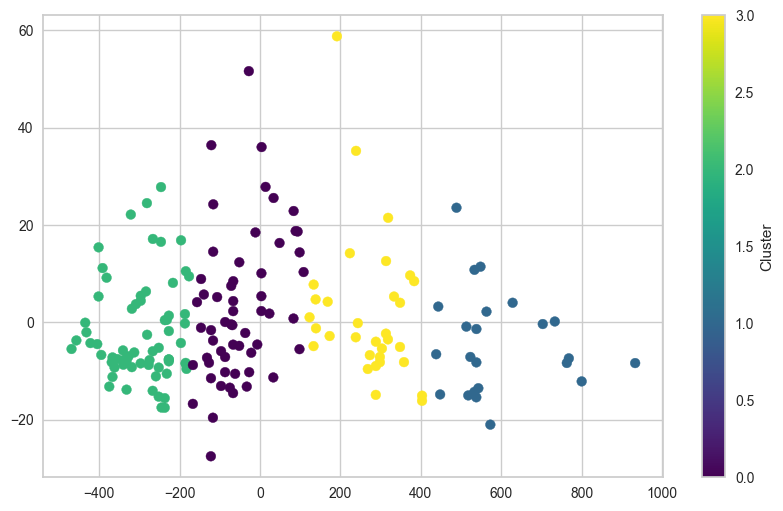

In [50]:

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['Cluster'] = labels

plt.figure(figsize=(10, 6))
scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Cluster'], cmap='viridis')

plt.colorbar(scatter, label='Cluster')

plt.show()

## 8. Generate a series of t-SNE plots showing the clusters at a variety of perplexities.

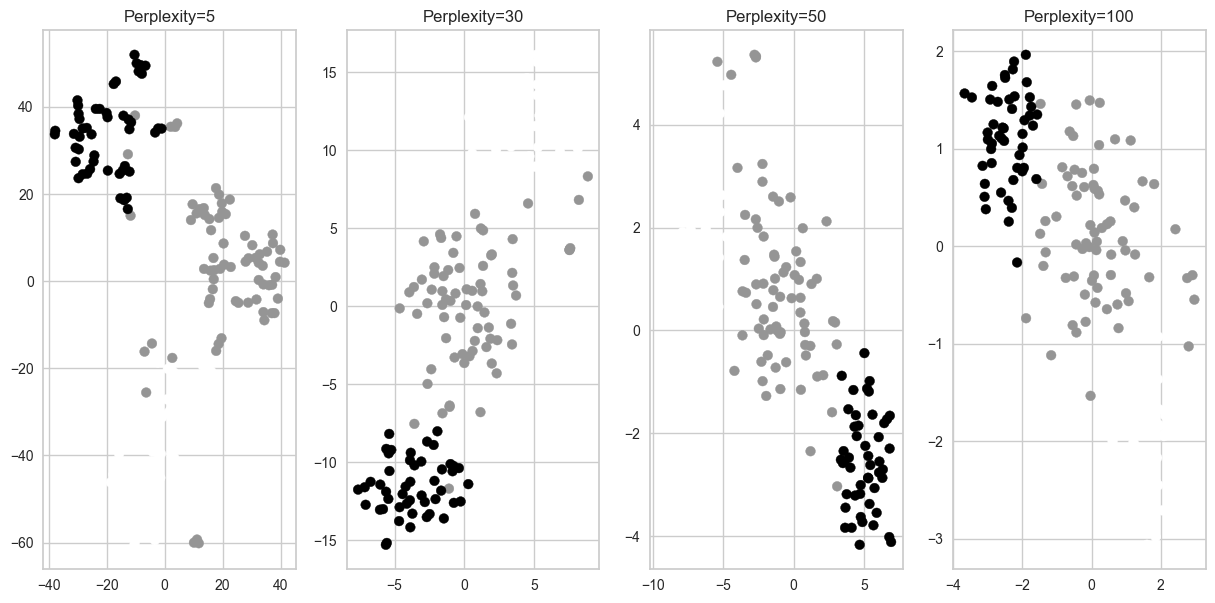

In [55]:
fig, ax = plt.subplots(1, 4, figsize=(15, 7))

for i,p in enumerate([5, 30, 50, 100]):
    
    tsne=TSNE(perplexity=p)
    
    x_emb=tsne.fit_transform(X)
    
    ax[i].scatter(x_emb[:,0], x_emb[:,1], c=y)
    ax[i].set_title('Perplexity={}'.format(p))
    
plt.show();